In [409]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('dark_background')
%matplotlib inline

__Загружаем данные из csv-файла__

In [410]:
file_path = '../twisted_rails/data/bd2_3/forward/current.csv'
data = pd.read_csv(file_path, sep=';')

data.head()

,billet_points,20231102181150t,20231102213249t,20231102224155t,20231103000416t,20231103010034t,20231103030433t,20231103035336t,20231103044016t,20231103052913t,...,20231128024855t,20231128212418t,20231128225206t,20231128233150t,20231129002723t,20231129012055t,20231129020039t,20231129024241t,20231129033802t,20231129041810t
0,"0,0","103,0","96,0","125,0","109,0","95,0","122,0","104,0","122,0","110,0",...,"205,0","121,0","109,0","141,0","135,0","143,0","106,0","102,0","85,0","104,0"
1,"0,1","103,0","155,0","125,0","90,0","95,0","132,0","112,5","93,0","110,0",...,"139,5","121,0","109,0","141,0","135,0","143,0","84,0","102,0","85,0","131,0"
2,"0,2","131,0","155,0","152,0","90,0","70,0","142,0","121,0","93,0","148,0",...,"74,0","146,0","129,0","141,0","135,0","155,0","84,0","80,0","104,5","131,0"
3,"0,4","260,0","74,0","152,0","100,0","70,0","142,0","174,5","119,0","148,0",...,"254,0","146,0","197,5","76,0","160,0","167,0","261,0","80,0","124,0","206,0"
4,"0,5","260,0","74,0","345,0","100,0","70,0","246,0","228,0","119,0","217,0",...,"254,0","222,0","266,0","76,0","160,0","264,0","261,0","226,5","124,0","206,0"


In [411]:
# Проверка значений на тип данных
data.dtypes

billet_points      object
20231102181150t    object
20231102213249t    object
20231102224155t    object
20231103000416t    object
                    ...  
20231129012055t    object
20231129020039t    object
20231129024241t    object
20231129033802t    object
20231129041810t    object
Length: 223, dtype: object

__Определяем функцию для построения графиков__

In [412]:
def ploting(Xmin, Xmax, Ymin, Ymax, Xdiv, Ydiv, xlabel, ylabel, title, show=True):

    # Xmin - минимальное значение по оси X
    # Xmax - максимальное значение по оси X
    # Ymin - минимальное значение по оси Y
    # Ymax - максимальное значение по оси Y
    # Xdiv - шкала деления по оси X
    # Ydiv - шкала деления по оси Y
    # Xlabel - наименование оси X
    # Ylabel - наименование оси Y
    # title - Наименование графика

    # Построение графиков по всем выборкам
    plt.figure(figsize=(16, 10))

    colors = iter(plt.cm.rainbow(np.linspace(0, 1, len(data.columns) - 1)))

    for col in data.columns:
        if col != 'billet_points':
            color = next(colors)
            plt.plot(data['billet_points'], data[col], label=col, c=color)

    plt.xticks(np.arange(Xmin, Xmax, Xdiv))
    plt.xlim(Xmin, Xmax)
    plt.yticks(np.arange(Ymin, Ymax, Ydiv))
    plt.ylim(Ymin, Ymax)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True, linestyle='--', alpha=0.6)

    if show:
        plt.show()

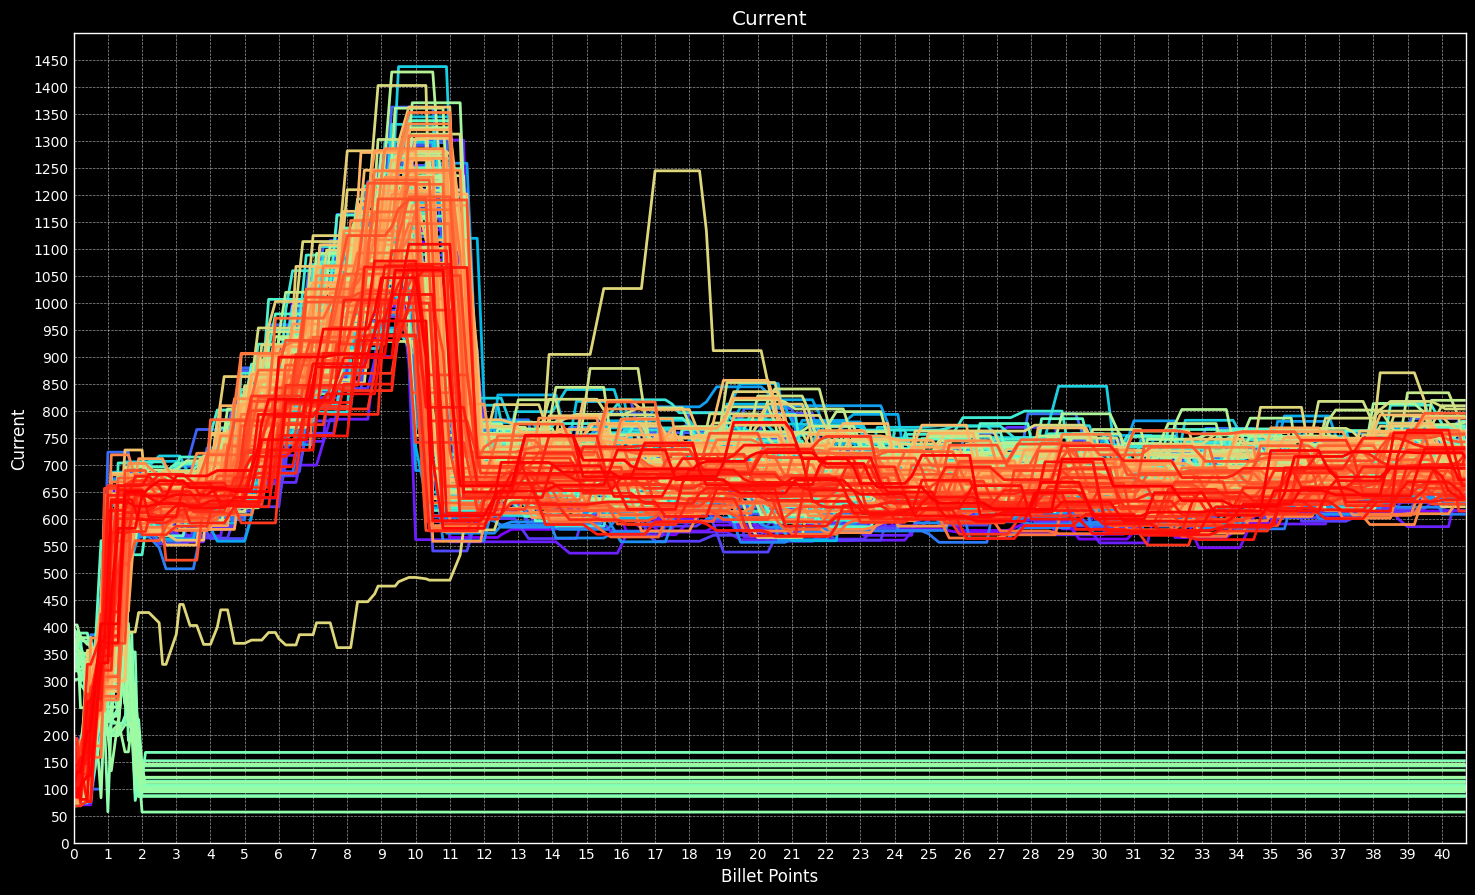

In [413]:
# Явное преобразование всех значений в строковый формат
data = data.astype(str)

# Замена запятых на точки и преобразование в числовой формат
for col in data.columns:
    data[col] = data[col].str.replace(',', '.').astype(float)

Xmin = data['billet_points'].min() # минимальное значение по оси X
Xmax = data['billet_points'].max() # максимальное значение по оси X
Ymin = 0 # минимальное значение по оси Y
Ymax = 1500 # максимальное значение по оси Y
Xdiv = 1 # шкала деления по оси X
Ydiv = 50 # шкала деления по оси Y
xlabel = 'Billet Points' # наименование оси X
ylabel = 'Current' # наименование оси Y
title = 'Current' # Наименование графика

# Построение графиков по всем выборкам
ploting(Xmin, Xmax, Ymin, Ymax, Xdiv, Ydiv, xlabel, ylabel, title)


In [414]:
# Удаление аномальных выборок
corrapted_zones = data[(data['billet_points'] > 7) & (data['billet_points'] < 9)]
for sample in data.columns:
    if sample != 'billet_points':
        if (corrapted_zones[sample] < 600).any():
            data = data.drop(sample, axis=1)

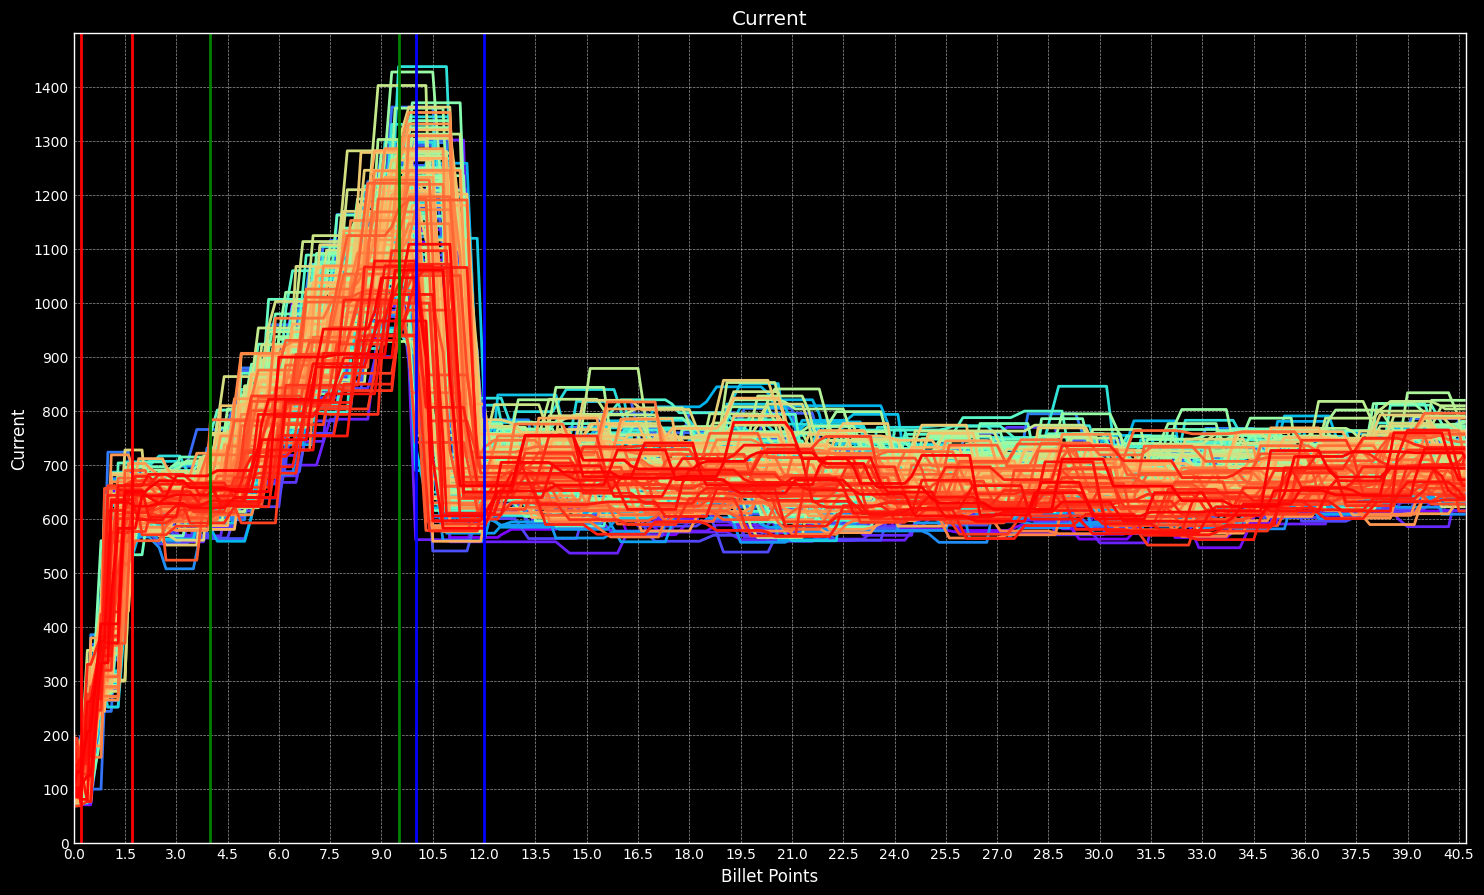

In [415]:
# Строим график без аномалий

Xmin = data['billet_points'].min()
Xmax = data['billet_points'].max()
Ymin = 0
Ymax = 1500
Xdiv = 1.5
Ydiv = 100
xlabel = 'Billet Points'
ylabel = 'Current'
title = 'Current'

# Построение графиков по всем выборкам
ploting(Xmin, Xmax, Ymin, Ymax, Xdiv, Ydiv, xlabel, ylabel, title, False)
plt.axvline(x=0.2, color='red', linestyle='-', linewidth=2, label='Start_1')
plt.axvline(x=1.7, color='red', linestyle='-', linewidth=2, label='End_1')
plt.axvline(x=4.0, color='green', linestyle='-', linewidth=2, label='Start_2')
plt.axvline(x=9.5, color='green', linestyle='-', linewidth=2, label='End_2')
plt.axvline(x=10.0, color='blue', linestyle='-', linewidth=2, label='Start_3')
plt.axvline(x=12.0, color='blue', linestyle='-', linewidth=2, label='End_3')
plt.show()

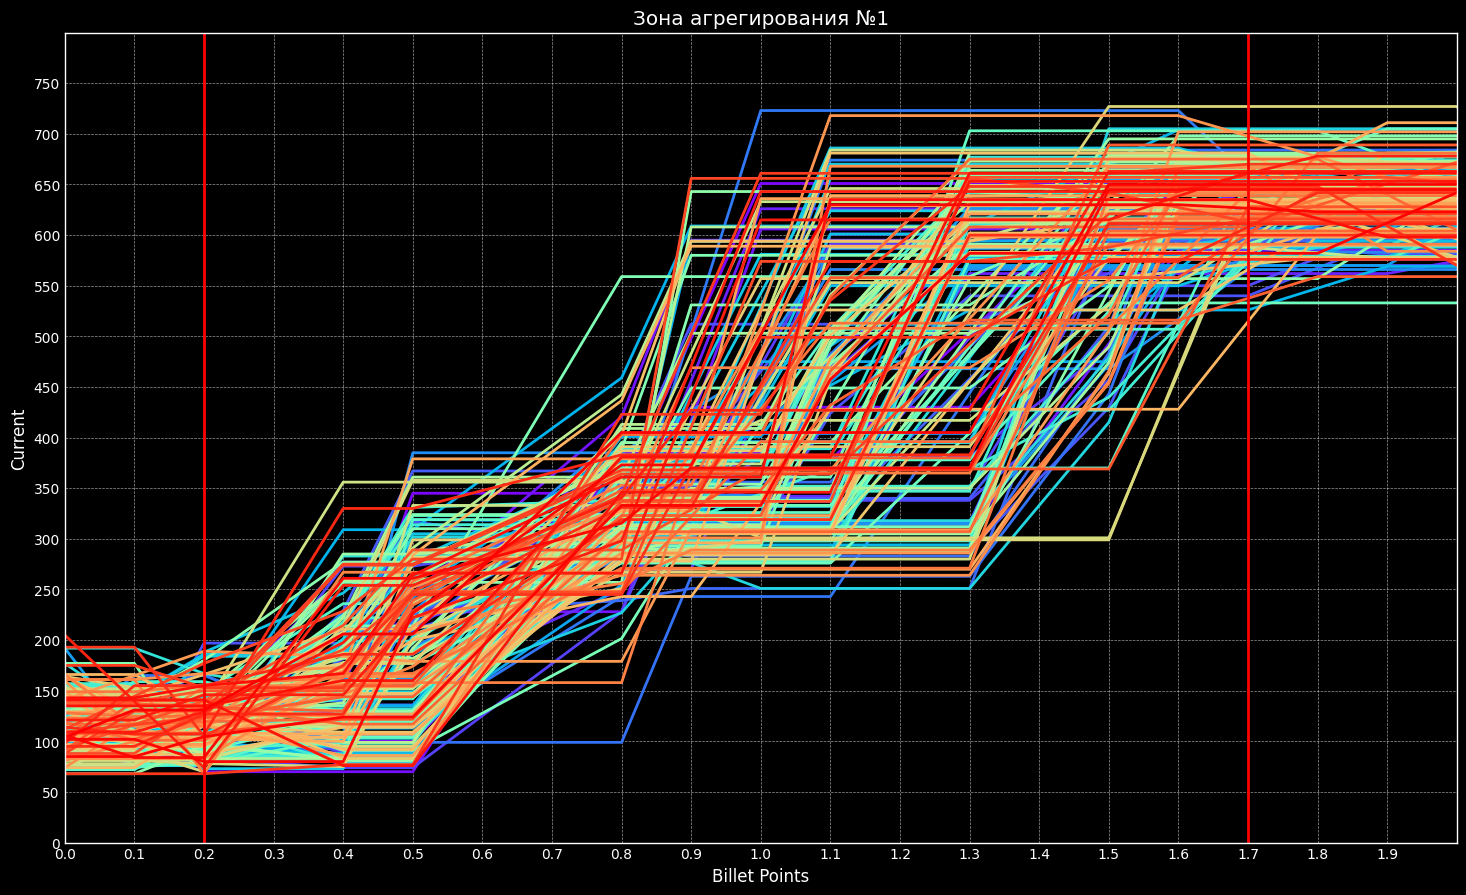

In [416]:
# Зона агрегирования №1 

Xmin = 0
Xmax = 2
Ymin = 0
Ymax = 800
Xdiv = 0.1
Ydiv = 50
xlabel = 'Billet Points'
ylabel = 'Current'
title = 'Зона агрегирования №1'

# Построение графиков по всем выборкам
ploting(Xmin, Xmax, Ymin, Ymax, Xdiv, Ydiv, xlabel, ylabel, title, False)
plt.axvline(x=0.2, color='red', linestyle='-', linewidth=2, label='Start_1')
plt.axvline(x=1.7, color='red', linestyle='-', linewidth=2, label='End_1')
plt.show()

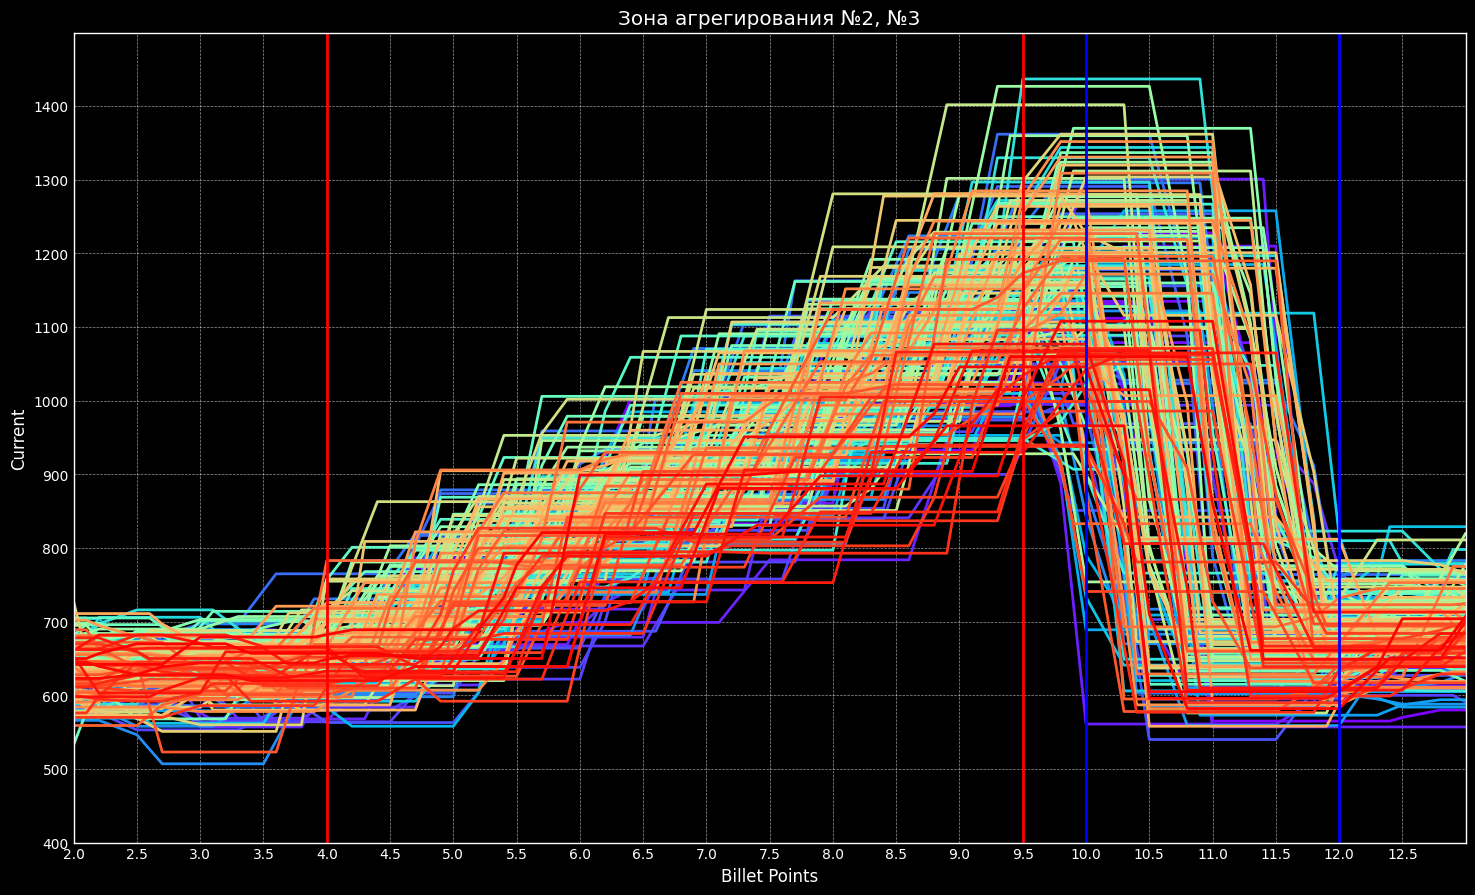

In [417]:
# Зона агрегирования №2, №3 

Xmin = 2
Xmax = 13
Ymin = 400
Ymax = 1500
Xdiv = 0.5
Ydiv = 100
xlabel = 'Billet Points'
ylabel = 'Current'
title = 'Зона агрегирования №2, №3'

# Построение графиков по всем выборкам
ploting(Xmin, Xmax, Ymin, Ymax, Xdiv, Ydiv, xlabel, ylabel, title, False)
plt.axvline(x=4.0, color='red', linestyle='-', linewidth=2, label='Start_2')
plt.axvline(x=9.5, color='red', linestyle='-', linewidth=2, label='End_2')
plt.axvline(x=10.0, color='blue', linestyle='-', linewidth=2, label='Start_3')
plt.axvline(x=12.0, color='blue', linestyle='-', linewidth=2, label='End_3')
plt.show()